In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
data = pd.read_csv('weights_heights.csv', index_col='Index')

In [21]:
def my_er(w, y, x):
    my_error = 0
    for i in range(0, len(y)):
        my_error += (y[i] - (w[0] + w[1]*x[i]))**2
    return my_error

In [22]:
y = np.array(data['Height'])
x = np.array(data['Weight'])

In [23]:
from scipy.optimize import minimize
bnds = ((-5, 5), (-100, 100))
res = minimize(lambda a: my_er(a, y, x), method = 'L-BFGS-B', x0 = (0, 0))
res

      fun: 67545.28708614818
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.06984919, -5.70871634])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 57
      nit: 9
   status: 0
  success: True
        x: array([57.57177252,  0.08200651])

In [24]:
res.x

array([57.57177252,  0.08200651])

Text(0, 0.5, 'Height')

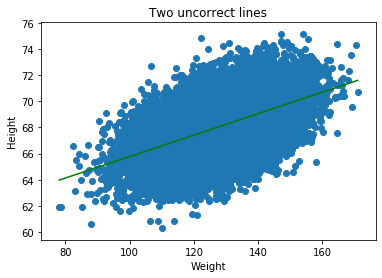

In [26]:
x1 = np.linspace(min(data['Weight']), max(data['Weight']))
w0, w1 = res.x[0], res.x[1]
y1 = w0 + w1*x1
plt.plot(x1, y1, color = 'green')
plt.scatter(y = data['Height'], x = data['Weight'])
plt.title('Two uncorrect lines')
plt.xlabel('Weight')
plt.ylabel('Height')